In [81]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import lagrange
import numpy as np
import math

# Rоэффициенты из задания
N = 8
A = 1


In [82]:
def get_period() -> float:
    '''
    Возвращает период функции по формуле
    ((2 * math.pi) / (2 * math.pi * N))
    '''
    return (1 / N)


def base_function(t: float) -> float:
    w = 2 * math.pi * N
    fi = (2 * math.pi) / N
    return A * math.sin(w * t + fi)


def generate_range(start: int, end: int, step: float)-> list:
    return np.arange(start, end, step).tolist()


def generate_function_list(data: list) -> list:
    '''
    Возвращает по list (x) list(y)
    т.е результат работы функции на всем периоде
    '''
    function_output = []
    for i in data:
        function_output.append(base_function(i))
    return function_output


def get_step_discret(count: int) -> list:
    '''
    Возвращает количество точек, необходимое для дискретного сигнала
    '''
    period = get_period()
    return generate_range(0, 2 * period, period / count)

def _poly_newton_coefficient(x, y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """
    m = len(x)
    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])
    return a

def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p
    return p


In [83]:
x_2 = get_step_discret(2)
x_4 = get_step_discret(4)
x_8 = get_step_discret(8)
x_16 = get_step_discret(16)
x_source = get_step_discret(128)

y_2 = generate_function_list(x_2)
y_4 = generate_function_list(x_4)
y_8 = generate_function_list(x_8)
y_16 = generate_function_list(x_16)
y_source = generate_function_list(x_source)


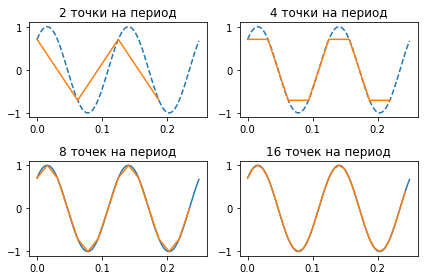

In [84]:
## Задание 1

fig = plt.figure()

for_2 = fig.add_subplot(2, 2, 1)
for_2.title.set_text('2 точки на период')
plt.plot(x_source, y_source, '--')
plt.plot(x_2, y_2, '-')

for_4 = fig.add_subplot(2, 2, 2)
for_4.title.set_text('4 точки на период')
plt.plot(x_source, y_source, '--')
plt.plot(x_4, y_4, '-')

for_8 = fig.add_subplot(2, 2, 3)
for_8.title.set_text('8 точек на период')
plt.plot(x_source, y_source)
plt.plot(x_8, y_8)

for_16 = fig.add_subplot(2, 2, 4)
for_16.title.set_text('16 точек на период')
plt.plot(x_source, y_source)
plt.plot(x_16, y_16)

# Margin and padding
fig.tight_layout()

plt.show()

In [85]:
f_2 = interp1d(x_2, y_2)
f_4 = interp1d(x_4, y_4)
f_8 = interp1d(x_8, y_8)
f_16 = interp1d(x_16, y_16)

f_cubic_2 = interp1d(x_2, y_2, kind='cubic')
f_cubic_4 = interp1d(x_4, y_4, kind='cubic')
f_cubic_8 = interp1d(x_8, y_8, kind='cubic')
f_cubic_16 = interp1d(x_16, y_16, kind='cubic')

f_newton_2 = []
for i in x_2:
    f_newton_2.append(newton_polynomial(x_2, y_2, i))

f_newton_4 = []
for i in x_4:
    f_newton_4.append(newton_polynomial(x_4, y_4, i))

f_newton_8 = []
for i in x_8:
    f_newton_8.append(newton_polynomial(x_8, y_8, i))

f_newton_16 = []
for i in x_16:
    f_newton_16.append(newton_polynomial(x_16, y_16, i))

xnew_2 = np.linspace(0, x_2[3], num=256)
xnew_4 = np.linspace(0, x_4[7], num=256)
xnew_8 = np.linspace(0, x_8[15], num=256)
xnew_16 = np.linspace(0, x_16[31], num=256)


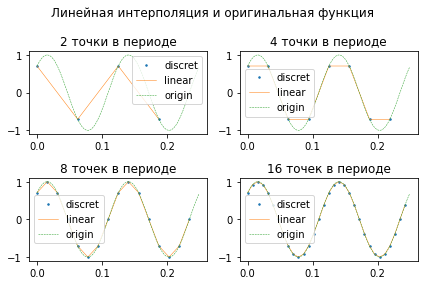

In [86]:
fig2 = plt.figure()
fig2.suptitle('Линейная интерполяция и оригинальная функция')

# 2
for_2 = fig2.add_subplot(2, 2, 1)
for_2.title.set_text('2 точки в периоде')

plt.plot(x_2, y_2, 'o', markersize=1.5)
plt.plot(xnew_2, f_2(xnew_2), '-', linewidth=0.5)
plt.plot(x_source, y_source, '--', linewidth=0.5)
plt.legend(['discret', 'linear', 'origin'], loc='best')

# 4
for_4 = fig2.add_subplot(2, 2, 2)
for_4.title.set_text('4 точки в периоде')

plt.plot(x_4, y_4, 'o', markersize=1.5)
plt.plot(xnew_4, f_4(xnew_4), '-', linewidth=0.5)
plt.plot(x_source, y_source, '--', linewidth=0.5)
plt.legend(['discret', 'linear', 'origin'], loc='best')

# 8
for_8 = fig2.add_subplot(2, 2, 3)
for_8.title.set_text('8 точек в периоде')

plt.plot(x_8, y_8, 'o', markersize=1.5)
plt.plot(xnew_8, f_8(xnew_8), '-', linewidth=0.5)
plt.plot(x_source, y_source, '--', linewidth=0.5)
plt.legend(['discret', 'linear', 'origin'], loc='best')

# 16
for_16 = fig2.add_subplot(2, 2, 4)
for_16.title.set_text('16 точек в периоде')

plt.plot(x_16, y_16, 'o', markersize=1.5)
plt.plot(xnew_16, f_16(xnew_16), '-', linewidth=0.5)
plt.plot(x_source, y_source, '--', linewidth=0.5)
plt.legend(['discret', 'linear', 'origin'], loc='best')

# Margin and padding
fig2.tight_layout()

plt.show()

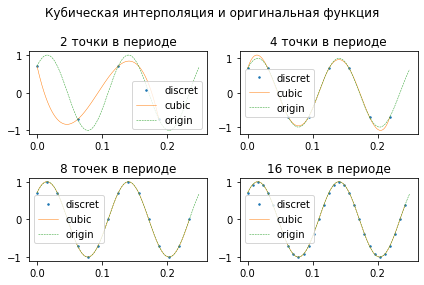

In [87]:
fig2 = plt.figure()
fig2.suptitle('Кубическая интерполяция и оригинальная функция')

# 2
for_2 = fig2.add_subplot(2, 2, 1)
for_2.title.set_text('2 точки в периоде')

plt.plot(x_2, y_2, 'o', markersize=1.5)
plt.plot(xnew_2, f_cubic_2(xnew_2), '-', linewidth=0.5)
plt.plot(x_source, y_source, '--', linewidth=0.5)
plt.legend(['discret', 'cubic', 'origin'], loc='best')

# 4
for_4 = fig2.add_subplot(2, 2, 2)
for_4.title.set_text('4 точки в периоде')

plt.plot(x_4, y_4, 'o', markersize=1.5)
plt.plot(xnew_4, f_cubic_4(xnew_4), '-', linewidth=0.5)
plt.plot(x_source, y_source, '--', linewidth=0.5)
plt.legend(['discret', 'cubic', 'origin'], loc='best')

# 8
for_8 = fig2.add_subplot(2, 2, 3)
for_8.title.set_text('8 точек в периоде')

plt.plot(x_8, y_8, 'o', markersize=1.5)
plt.plot(xnew_8, f_cubic_8(xnew_8), '-', linewidth=0.5)
plt.plot(x_source, y_source, '--', linewidth=0.5)
plt.legend(['discret', 'cubic', 'origin'], loc='best')

# 16
for_16 = fig2.add_subplot(2, 2, 4)
for_16.title.set_text('16 точек в периоде')

plt.plot(x_16, y_16, 'o', markersize=1.5)
plt.plot(xnew_16, f_cubic_16(xnew_16), '-', linewidth=0.5)
plt.plot(x_source, y_source, '--', linewidth=0.5)
plt.legend(['discret', 'cubic', 'origin'], loc='best')

# Margin and padding
fig2.tight_layout()

plt.show()

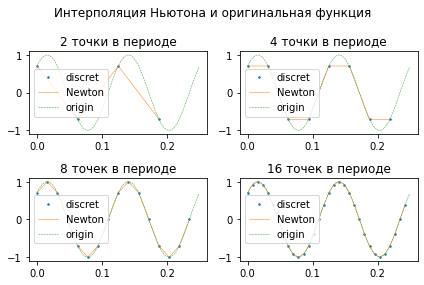

In [88]:

fig2 = plt.figure()
fig2.suptitle('Интерполяция Ньютона и оригинальная функция')

# 2
for_2 = fig2.add_subplot(2, 2, 1)
for_2.title.set_text('2 точки в периоде')

plt.plot(x_2, y_2, 'o', markersize=1.5)
plt.plot(x_2, f_newton_2, '-', linewidth=0.5)
plt.plot(x_source, y_source, '--', linewidth=0.5)
plt.legend(['discret', 'Newton', 'origin'], loc='best')

# 4
for_4 = fig2.add_subplot(2, 2, 2)
for_4.title.set_text('4 точки в периоде')

plt.plot(x_4, y_4, 'o', markersize=1.5)
plt.plot(x_4, f_newton_4, '-', linewidth=0.5)
plt.plot(x_source, y_source, '--', linewidth=0.5)
plt.legend(['discret', 'Newton', 'origin'], loc='best')

# 8
for_8 = fig2.add_subplot(2, 2, 3)
for_8.title.set_text('8 точек в периоде')

plt.plot(x_8, y_8, 'o', markersize=1.5)
plt.plot(x_8, f_newton_8, '-', linewidth=0.5)
plt.plot(x_source, y_source, '--', linewidth=0.5)
plt.legend(['discret', 'Newton', 'origin'], loc='best')

# 16
for_16 = fig2.add_subplot(2, 2, 4)
for_16.title.set_text('16 точек в периоде')

plt.plot(x_16, y_16, 'o', markersize=1.5)
plt.plot(x_16, f_newton_16, '-', linewidth=0.5)
plt.plot(x_source, y_source, '--', linewidth=0.5)
plt.legend(['discret', 'Newton', 'origin'], loc='best')

# Margin and padding
fig2.tight_layout()

plt.show()


In [ ]:
# 5 задание
def adc_model(Ymin: int,Ymax: int, N, y: list):
 #  [Ymin, Ymax] -динамический диапазон АЦП
 #  N -разрядность АЦП
 #  y -вектор, содержащий значения дискретного сигнала
 Nv=len(y)
 dy=(Ymax-Ymin) / 2 ^ N 
 z=[]
 for i in range(1, Nv):
     tmp=y[i]-Ymin
     z.append(math.round(tmp/dy))
 return z
